In [34]:
#This heart disease dataset is acquired from one of the multispecialty hospitals in India.
#Over 14 common features make it one of the heart disease datasets available so far for research purposes.
#This dataset consists of 1000 subjects with 12 features. This dataset will be useful for building early-stage heart disease detection
#as well as for generating predictive machine-learning models.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cardiovascular_Disease_Dataset.csv')

In [3]:
print(data.head())
print(data.info())

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

In [4]:
data.isna().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


target
1    580
0    420
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7a30cacb6d90>,
 [Text(-0.2735589045026723, 1.0654414698927848, '1'),
  Text(0.27355899764652647, -1.065441445977501, '0')],
 [Text(-0.1492139479105485, 0.5811498926687917, '58.0%'),
  Text(0.14921399871628713, -0.5811498796240914, '42.0%')])

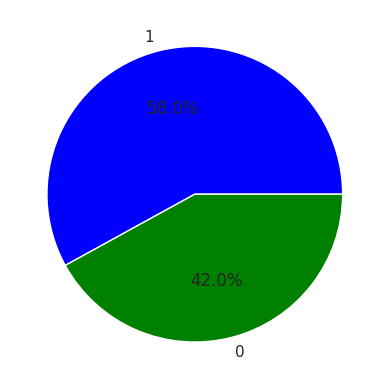

In [5]:

target_counts=data.target.value_counts()   #cout targets(whether heart disease detected or not)
print(target_counts)
plt.pie(target_counts,labels=target_counts.index,autopct='%1.1f%%',colors=['blue','green'])
#label-column.values,,autopct -upto  decimal place

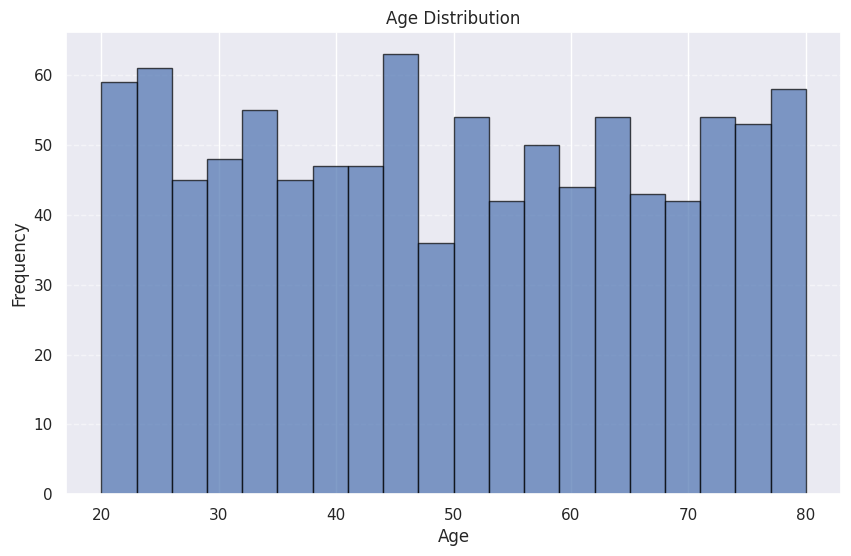

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

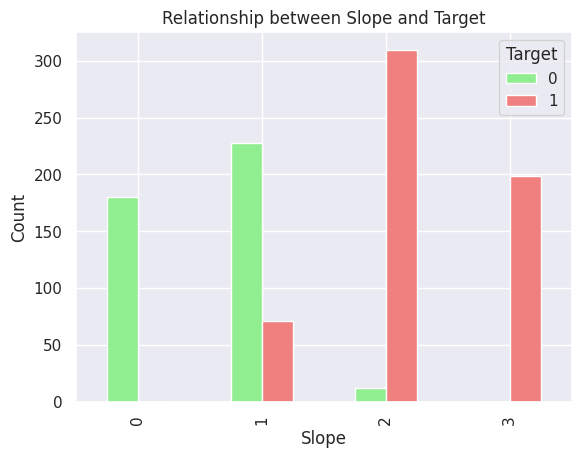

In [7]:
grouped_data = data.groupby(['slope', 'target']).size().unstack()
grouped_data
grouped_data.plot(kind='bar', stacked=False,color=["lightgreen","lightcoral"])
plt.xlabel('Slope')
plt.ylabel('Count')
plt.title('Relationship between Slope and Target')
plt.legend(title='Target')
plt.show()

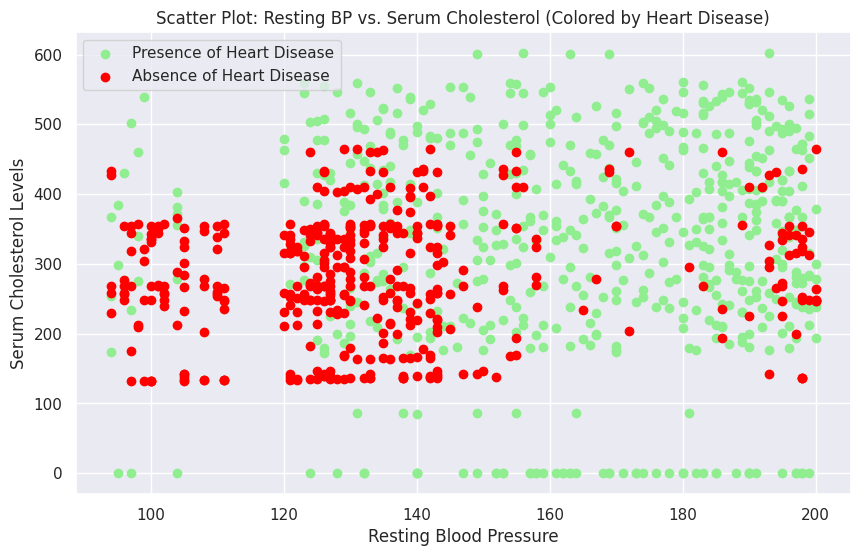

In [8]:
heart_disease = data[data['target'] == 1]
no_heart_disease = data[data['target'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(heart_disease['restingBP'], heart_disease['serumcholestrol'], color='lightgreen', label='Presence of Heart Disease')
plt.scatter(no_heart_disease['restingBP'], no_heart_disease['serumcholestrol'], color='red', label='Absence of Heart Disease')

plt.xlabel('Resting Blood Pressure')
plt.ylabel('Serum Cholesterol Levels')
plt.title('Scatter Plot: Resting BP vs. Serum Cholesterol (Colored by Heart Disease)')
plt.legend()

plt.show()


<ipython-input-9-e770828f9941>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chestpain', y='maxheartrate', data=data, palette='YlOrRd')


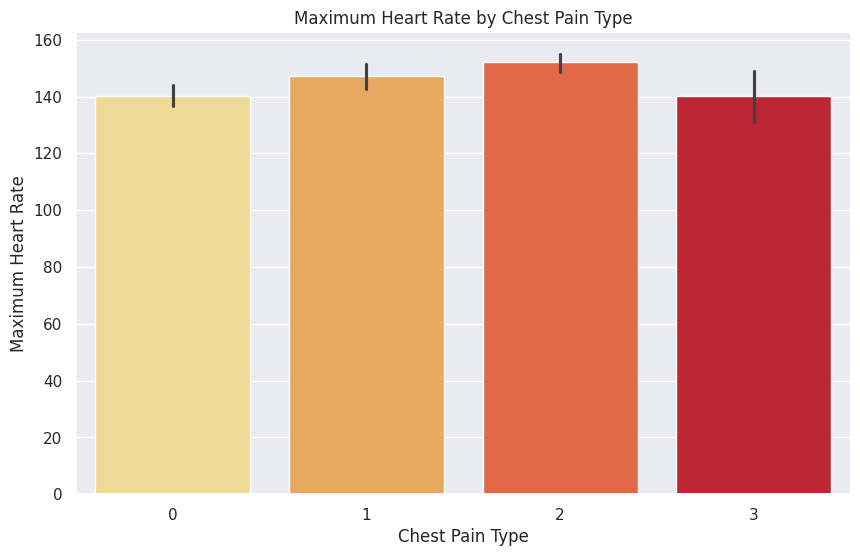

In [9]:
# Maximum Heart Rate by Chest Pain Type

plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=data, palette='YlOrRd')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [10]:
features = list(data.columns)
features.remove('target')
print(features)
print(type(data[features]))
data1 = data[features + ['target']]
print("=========================")
print(data1)
# print(data)
# print(type(data),type(data1))

['patientid', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']
<class 'pandas.core.frame.DataFrame'>
     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999

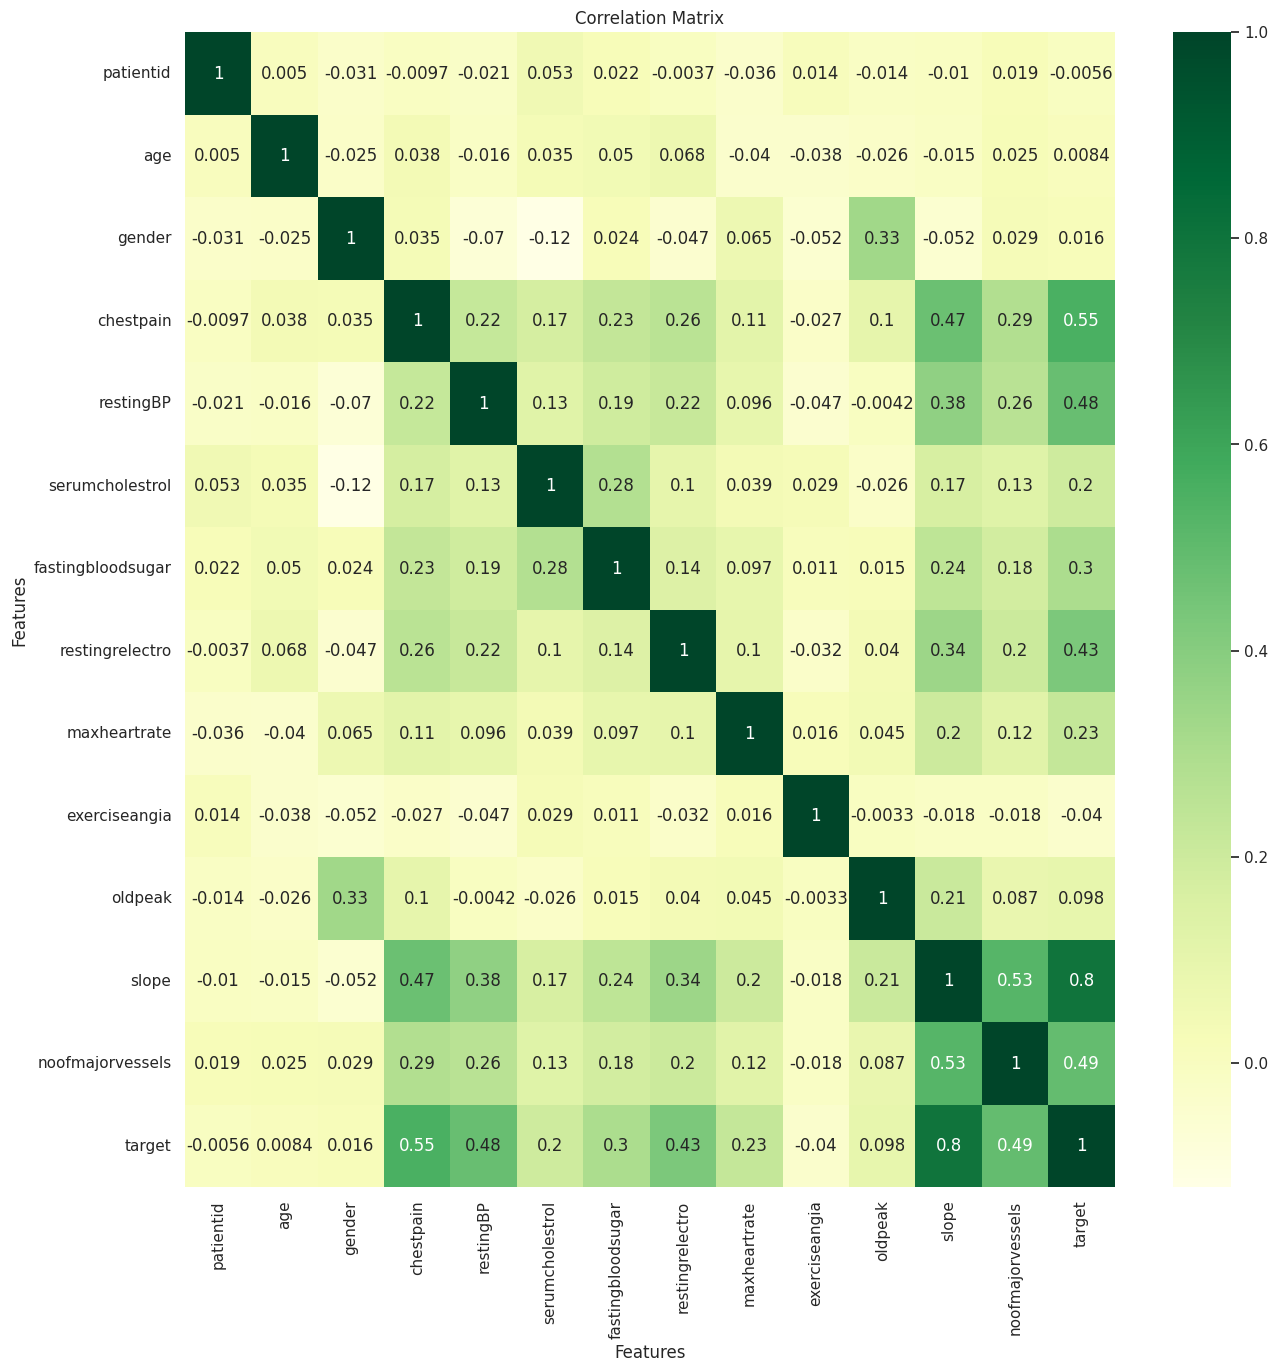

In [11]:
# find correlation
correlation_matrix = data1.corr()
fig,ax=plt.subplots(figsize=(15,15))

ax=sns.heatmap(correlation_matrix, annot=True, cmap="YlGn")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix")
plt.show()

In [12]:
# drop UNECCESORY CoLUMn AND LABEL
X=data1.drop(['patientid','target'],axis=1)
X.columns

y=data1['target']
patientid=data1['patientid'] #store dropped column
print(y)

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    0
Name: target, Length: 1000, dtype: int64


In [14]:
#train test split
#divide dataset into two parts: training set and testing set.
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, patientid, test_size=0.2, random_state=42)
#x=input var, y=target var,patient_id= used for identification purposes.
#testsize:20% of the data will be used for testing, remaining 80% for training.
# ranndom state:ensures that the data is split in the same way every time you run the code

In [16]:
# hyperparameters  is used to configure the Logistic Regression model
hyperparameters = {
    'penalty': 'l2',
    'solver': 'lbfgs',  # Solver algorithm
    'max_iter': 100  # number of iterations
}

#Regularization is a technique used to prevent overfitting

In [30]:
# model_log = LogisticRegression(**hyperparameters)
model_log = LogisticRegression()

result_log=model_log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
y_log_pred = model_log.predict(X_test)
y_log_pred
accuracy = accuracy_score(y_test, y_log_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [32]:
print("Classification Report:")
print(classification_report(y_test, y_log_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        83
           1       0.93      0.97      0.95       117

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [35]:
confusion_matrix=metrics.confusion_matrix(y_test, y_log_pred)
confusion_matrix

array([[ 75,   8],
       [  3, 114]])

In [62]:
# print(X_test)
# print(type(X_test))
test=49,1,2,133,142,0,0,202,1,5,1,0
test1=43,1,0,138,295,1,1,153,0,3.2,2,2
print(test1)
x = pd.DataFrame([test], columns=X.columns)
x1=pd.DataFrame([test1], columns=X.columns)
print(x1)
print(x)
y_log_pred = model_log.predict(x1)
print(':::::::::::::::::::::::::')
print(y_log_pred)

(43, 1, 0, 138, 295, 1, 1, 153, 0, 3.2, 2, 2)
   age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   43       1          0        138              295                  1   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1           153              0      3.2      2   

   noofmajorvessels  
0                 2  
   age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   49       1          2        133              142                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                0           202              1        5      1   

   noofmajorvessels  
0                 0  
:::::::::::::::::::::::::
[1]
